In [37]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from collections import Counter
import string
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [38]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'

# Read the CSV file into a DataFrame.
# If the file does not have headers, specify header=None and assign a column name.
df = pd.read_csv(train_file_path, header=None, names=['sentence'])
df_test = pd.read_csv(test_file_path, header=None, names=['sentence'])

#### EDA on train dataset

In [39]:
# DataFrame structure and general info
print("Training DataFrame Info:")
df.info()

# Display summary statistics
print("\nDataFrame Summary Statistics:")
print(df.describe(include='all'))

# Check the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(df.head())

Training DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52499 entries, 0 to 52498
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  52499 non-null  object
dtypes: object(1)
memory usage: 410.3+ KB

DataFrame Summary Statistics:
            sentence
count          52499
unique         51134
top     [('.', '.')]
freq              44

First Few Rows:
                                            sentence
0  [('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM...
1  [('The', 'DET'), ('industry', 'NOUN'), ('has',...
2  [('Love', 'VERB'), ('this', 'DET'), ('place', ...
3  [('This', 'DET'), ('problem', 'NOUN'), ('of', ...
4  [('Esso', 'PROPN'), ('said', 'VERB'), ('0', 'X...


#### EDA on test dataset

In [40]:
# DataFrame structure and general info
print("Testing DataFrame Info:")
df_test.info()

# Display summary statistics
print("\nDataFrame Summary Statistics:")
print(df_test.describe(include='all'))

# Check the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(df_test.head())

df

Testing DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65625 entries, 0 to 65624
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  65625 non-null  object
dtypes: object(1)
memory usage: 512.8+ KB

DataFrame Summary Statistics:
            sentence
count          65625
unique         63760
top     [('.', '.')]
freq              53

First Few Rows:
                                            sentence
0                                  [('DF', 'PROPN')]
1  [('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM...
2  [('The', 'DET'), ('industry', 'NOUN'), ('has',...
3  [('Love', 'VERB'), ('this', 'DET'), ('place', ...
4  [('This', 'DET'), ('problem', 'NOUN'), ('of', ...


,sentence
0,"[('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM..."
1,"[('The', 'DET'), ('industry', 'NOUN'), ('has',..."
2,"[('Love', 'VERB'), ('this', 'DET'), ('place', ..."
3,"[('This', 'DET'), ('problem', 'NOUN'), ('of', ..."
4,"[('Esso', 'PROPN'), ('said', 'VERB'), ('0', 'X..."
...,...
52494,"[('Superstition', 'NOUN'), ('has', 'VERB'), ('..."
52495,"[('You', 'PRON'), ('now', 'ADV'), ('should', '..."
52496,"[('But', 'CONJ'), ('in', 'ADP'), ('the', 'DET'..."
52497,"[('Specifically', 'ADV'), (',', 'PUNCT'), ('Je..."


#### EDA: Comparision between train and test dataset


Length of Train Dataset before dropping duplicates: 52499
Length of Test Dataset before dropping duplicates: 65625

Length of Train Dataset after dropping duplicates: 51134
Length of Test Dataset after dropping duplicates: 63760

Unique to Train: 0
Unique to Test: 12626
Common rows: 51134


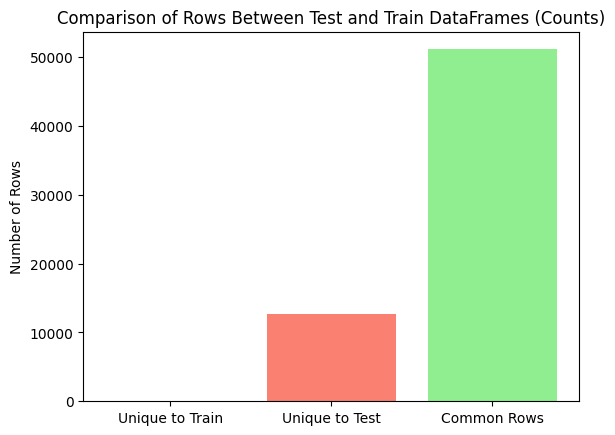


Percentage of Unique to Train: 0.00%
Percentage of Unique to Test: 19.80%
Percentage of Common Rows: 80.20%


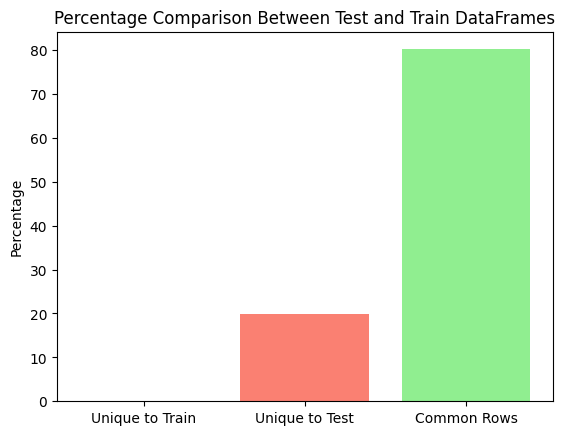

Train dataset assertion passed ✅
Test dataset assertion passed ✅
Total row counts assertion passed ✅


In [41]:
# Drop Duplicates and Compare
print("\nLength of Train Dataset before dropping duplicates:", len(df))
print("Length of Test Dataset before dropping duplicates:", len(df_test))

df = df.drop_duplicates(subset=['sentence'])
df_test = df_test.drop_duplicates(subset=['sentence'])

print("\nLength of Train Dataset after dropping duplicates:", len(df))
print("Length of Test Dataset after dropping duplicates:", len(df_test))

unique_to_df1 = df[~df['sentence'].isin(df_test['sentence'])]
unique_to_df2 = df_test[~df_test['sentence'].isin(df['sentence'])]
common_rows = pd.merge(df, df_test, on='sentence')

# Create counts for visualization
counts = {
    'Unique to Train': len(unique_to_df1),
    'Unique to Test': len(unique_to_df2),
    'Common Rows': len(common_rows)
}

print("\nUnique to Train:", len(unique_to_df1))
print("Unique to Test:", len(unique_to_df2))
print("Common rows:", len(common_rows))

# Plotting comparison for counts
plt.bar(counts.keys(), counts.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Comparison of Rows Between Test and Train DataFrames (Counts)")
plt.ylabel("Number of Rows")
plt.show()

# Calculate percentages for better insight
#total_rows = len(df) + len(df_test) [This is incorrect as we're counting the common rows twice]
total_rows = counts["Unique to Train"] + counts["Unique to Test"] + counts["Common Rows"]
percentages = {key: (value / total_rows) * 100 for key, value in counts.items()}

print("\nPercentage of Unique to Train: {:.2f}%".format(percentages['Unique to Train']))
print("Percentage of Unique to Test: {:.2f}%".format(percentages['Unique to Test']))
print("Percentage of Common Rows: {:.2f}%".format(percentages['Common Rows']))

# Plotting percentage comparison
plt.bar(percentages.keys(), percentages.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Percentage Comparison Between Test and Train DataFrames")
plt.ylabel("Percentage")
plt.show()

# Assertions for sanity checks
assert len(df) == len(unique_to_df1) + len(common_rows), "Mismatch in Train dataset counts!"
print("Train dataset assertion passed ✅")

assert len(df_test) == len(unique_to_df2) + len(common_rows), "Mismatch in Test dataset counts!"
print("Test dataset assertion passed ✅")

assert sum(counts.values()) == len(df) + len(df_test) - len(common_rows), "Total row counts assertion passed ✅"
print("Total row counts assertion passed ✅")



#### Sentence Parsing
Converting the given sentence string to a list of tuples.

In [42]:
df['parsed_sentence'] = df['sentence'].apply(lambda x: ast.literal_eval(x))
df_test['parsed_sentence'] = df_test['sentence'].apply(lambda x: ast.literal_eval(x))

/var/folders/mz/ywg60v213710yk8053f7h4k00000gn/T/ipykernel_35591/1339998295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_sentence'] = df['sentence'].apply(lambda x: ast.literal_eval(x))


#### EDA on train dataset

In [43]:
num_sentences = len(df)
print("\nTotal number of sentences:", num_sentences)
# Display DataFrame information
print("\nDataFrame Info:")
print(df.info())


Total number of sentences: 51134

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 51134 entries, 0 to 52498
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentence         51134 non-null  object
 1   parsed_sentence  51134 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [44]:
# print the first row with all columns
print("After converting from string to list of tuples, the parsed sentence in first row:")
print(df['parsed_sentence'].iloc[0])
print(type(df['parsed_sentence'].iloc[0]))
# print more info about the column parsed. like, the datatype and stuff
# print(df['parsed'].apply(type).value_counts())
print("\nFirst value in first row of the parsed column:")
print(df['parsed_sentence'].iloc[0][0])
print(type(df['parsed_sentence'].iloc[0][0]))

After converting from string to list of tuples, the parsed sentence in first row:
[('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM', 'NOUN')]
<class 'list'>

First value in first row of the parsed column:
('03/01/2001', 'NUM')
<class 'tuple'>


In [45]:
# Calculate sentence lengths (number of word-tag pairs per sentence)
df['sentence_length'] = df['parsed_sentence'].apply(lambda sentence: len(sentence))
print("\nSentence length statistics:")
print(df['sentence_length'].describe())

print("\nLength of sentences for first few rows:")
print(df['sentence_length'].head())


Sentence length statistics:
count    51134.000000
mean        20.555501
std         13.278339
min          1.000000
25%         11.000000
50%         18.000000
75%         28.000000
max        180.000000
Name: sentence_length, dtype: float64

Length of sentences for first few rows:
0     3
1    10
2     4
3    23
4    10
Name: sentence_length, dtype: int64


/var/folders/mz/ywg60v213710yk8053f7h4k00000gn/T/ipykernel_35591/2767257790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence_length'] = df['parsed_sentence'].apply(lambda sentence: len(sentence))


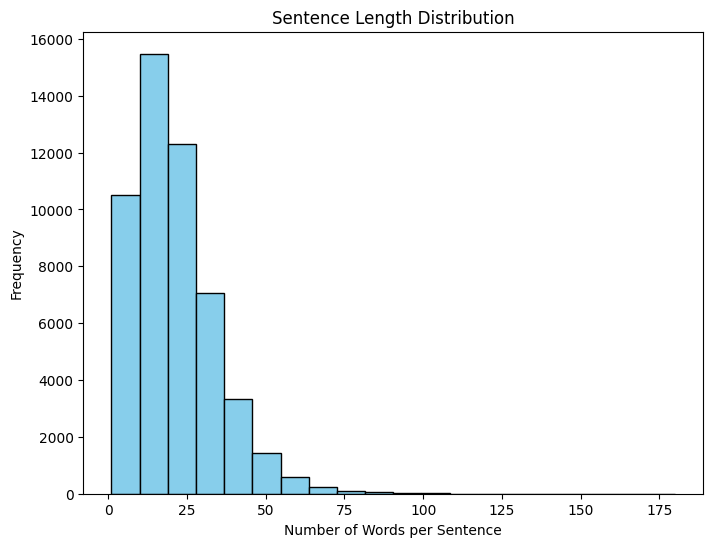

In [46]:
# Visualize the distribution of sentence lengths
plt.figure(figsize=(8, 6))
df['sentence_length'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words per Sentence")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

#### Separating word and corresponding tag pair for each word in all sentences 

In [47]:
# Create a list of dictionaries where each dictionary represents a word-tag pair.
records = []
for sentence in df['parsed_sentence']:
    for word, tag in sentence:
        records.append({'word': word, 'tag': tag})

# Create a new DataFrame from the records.
df_words = pd.DataFrame(records)
print(df_words)

               word    tag
0        03/01/2001    NUM
1             01:35    NUM
2                PM   NOUN
3               The    DET
4          industry   NOUN
...             ...    ...
1051080           .  PUNCT
1051081           B    ADJ
1051082           &  CCONJ
1051083           w    ADJ
1051084           .  PUNCT

[1051085 rows x 2 columns]


#### EDA: word-tag distribution

In [48]:
# Check basic information and types
print("Dataset Info:")
df_words.info()

# Summary statistics
print("\nDataset Summary Statistics:")
print(df_words.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df_words.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051085 entries, 0 to 1051084
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   word    1051085 non-null  object
 1   tag     1051085 non-null  object
dtypes: object(2)
memory usage: 16.0+ MB

Dataset Summary Statistics:
           word      tag
count   1051085  1051085
unique    58110       21
top         the     NOUN
freq      54411   239116

Missing Values:
word    0
tag     0
dtype: int64


Length of tag distribution: 21

Tag Frequency Distribution:
tag
NOUN     239116
VERB     151350
ADP      124875
DET      115502
.         94258
ADJ       76492
ADV       48887
PRON      48510
CONJ      27227
PUNCT     23089
PROPN     18938
PRT       18667
NUM       16778
X         13147
AUX       12563
PART       7514
CCONJ      6446
SCONJ      3666
_          2643
INTJ        712
SYM         705
Name: count, dtype: int64


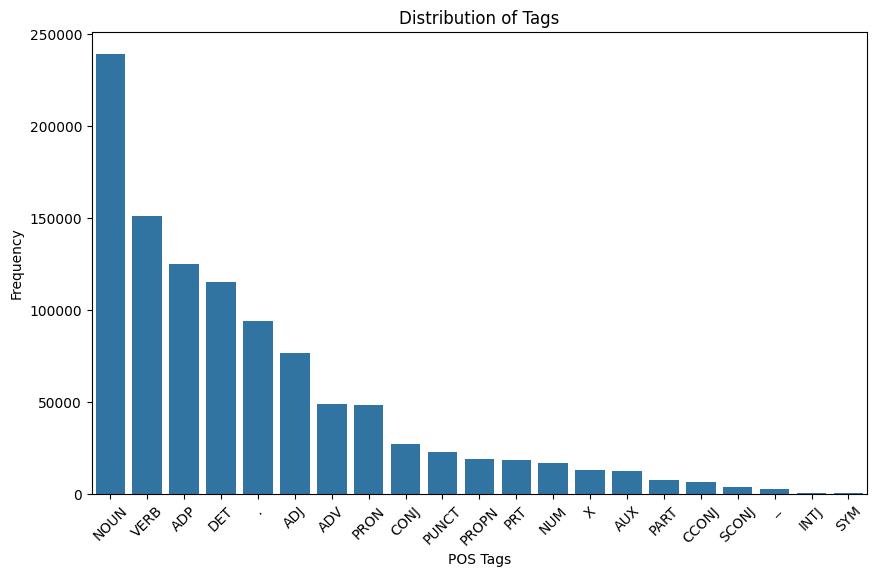

In [49]:
# Count the frequency of each tag
tag_distribution = df_words['tag'].value_counts()
print("Length of tag distribution:", len(tag_distribution))
print("\nTag Frequency Distribution:")
print(tag_distribution)

# Plot the distribution of tags
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=tag_distribution.index, y=tag_distribution.values)
plt.title("Distribution of Tags")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()



Top 10 Most Frequent Words:
word
the     54411
,       48728
.       42284
of      31048
and     24549
to      23850
a       19556
in      17670
is      10267
that     9427
Name: count, dtype: int64


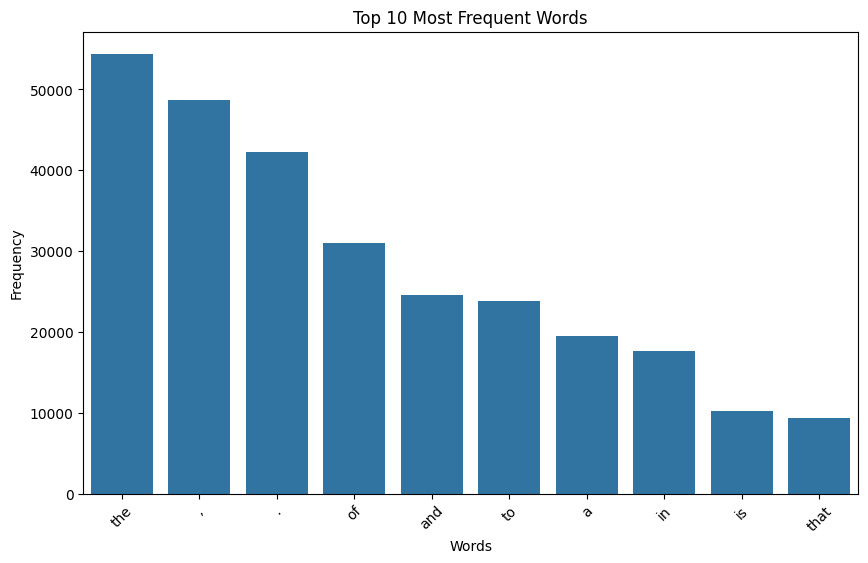

In [50]:
# Count the frequency of words
word_frequency = df_words['word'].value_counts()
print("\nTop 10 Most Frequent Words:")
print(word_frequency.head(10))

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=word_frequency.head(10).index, y=word_frequency.head(10).values)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


### Step-2. Pre-Processing

#### Text Cleaning
- Converting to Lowercase
- Removing URLs if any using regex library
- Removing non-word and non-whitespace characters: punctuations marks, symbols, other special characters

In [51]:
def clean_word(word):
    # Convert to lowercase
    word = word.lower()
    
    # Remove URLs
    word = re.sub(r'http\S+|www\S+|https\S+', '', word)
    
    # Remove non-word and non-whitespace characters, but not tags like '.'
    word = re.sub(r'[^\w\s]', '', word)
    
    # # Remove alphanumeric words containing digits but leave words like underscores
    # word = re.sub('\b\w*\d\w*\b', '', word)
    
    # Remove words that consist only of underscores
    if re.match(r'^\_+$', word):
        return None  # Remove this word if it consists of only underscores

    # Return cleaned word if it's not purely numeric and not empty
    return word if word else None

def clean_sentence(sentence):
    cleaned_sentence = []
    for word, tag in sentence:
        # Only clean the word, keep the tag unchanged
        cleaned_word = clean_word(word)
        if cleaned_word and tag != 'X' and tag != 'NUM' and tag != '_' and tag != 'SYM':  # Keep valid cleaned words and remove 'X' tags
            cleaned_sentence.append((cleaned_word, tag))
    return cleaned_sentence

# Apply the updated cleaning function to the parsed sentences
df['parsed_sentence'] = df['parsed_sentence'].apply(clean_sentence)
# Doing it on test dataset also
df_test['parsed_sentence'] = df_test['parsed_sentence'].apply(clean_sentence)


/var/folders/mz/ywg60v213710yk8053f7h4k00000gn/T/ipykernel_35591/2087468493.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_sentence'] = df['parsed_sentence'].apply(clean_sentence)


In [52]:
# Extract all words and tags from the parsed sentences
all_words = [word for sentence in df['parsed_sentence'] for word, _ in sentence]
all_tags = [tag for sentence in df['parsed_sentence'] for __, tag in sentence]
print("Total words: ", len(all_words), "Total tags: ", len(all_tags))
# Get unique words and tags
unique_words = set(all_words)
unique_tags = set(all_tags)

print(f"Total Unique Words: {len(unique_words)}")
print(f"Total Unique Tags: {len(unique_tags)}")
print("Few Unique Words:", list(unique_words)[:10])
print("\nFew Unique Tags:", list(unique_tags))


Total words:  899541 Total tags:  899541
Total Unique Words: 45362
Total Unique Tags: 15
Few Unique Words: ['privet', 'abuses', 'planetarium', 'balkanized', 'kitchen', 'emanuel', 'orgasm', 'peng', 'abilities', 'giants']

Few Unique Tags: ['DET', 'ADP', 'VERB', 'INTJ', 'PRON', 'ADJ', 'PRT', 'PART', 'ADV', 'AUX', 'NOUN', 'PROPN', 'SCONJ', 'CONJ', 'CCONJ']


In [53]:
# Create dictionaries mapping words and tags to indices
word_to_index = {word: idx for idx, word in enumerate(sorted(unique_words))}
tag_to_index = {tag: idx for idx, tag in enumerate(sorted(unique_tags))}

print("\nSample Word to Index Mapping:", list(word_to_index.items())[:10])
print("\nSample Tag to Index Mapping:", list(tag_to_index.items()))


Sample Word to Index Mapping: [('0002', 0), ('000s', 1), ('0025in', 2), ('0080in', 3), ('01feb02', 4), ('01mvm', 5), ('027', 6), ('03', 7), ('03m', 8), ('05', 9)]

Sample Tag to Index Mapping: [('ADJ', 0), ('ADP', 1), ('ADV', 2), ('AUX', 3), ('CCONJ', 4), ('CONJ', 5), ('DET', 6), ('INTJ', 7), ('NOUN', 8), ('PART', 9), ('PRON', 10), ('PROPN', 11), ('PRT', 12), ('SCONJ', 13), ('VERB', 14)]


#### Stop word removal

In [54]:
# # Download stopwords if not already downloaded
# nltk.download('stopwords')

# # Define the stop words set
# stop_words = set(stopwords.words('english'))

In [55]:
# # Count the total stop words before removal
# total_stop_words_before = sum(
#     word.lower() in stop_words for sentence in df['parsed_sentence'] for word, _ in sentence
# )

# print(f"Total number of stop words before removal: {total_stop_words_before}")

In [56]:
# def remove_stop_words(sentence):
#     # Remove stop words from the sentence while keeping tags intact
#     return [(word, tag) for word, tag in sentence if word.lower() not in stop_words]

# # Apply the stop word removal function
# df['parsed_sentence'] = df['parsed_sentence'].apply(remove_stop_words)
# df_test['parsed_sentence'] = df_test['parsed_sentence'].apply(remove_stop_words)

In [57]:
# # Count the total stop words after removal
# total_stop_words_after = sum(
#     word.lower() in stop_words for sentence in df['parsed_sentence'] for word, _ in sentence
# )

# print(f"Total number of stop words after removal: {total_stop_words_after}")


#### Generating Vocabulary

In [58]:
from collections import defaultdict

# Extract unique tags and words from the parsed sentences to account all the unique tags and words
tags = set()
words = set()

for sentence in df['parsed_sentence']:
    for item in sentence:
        word, tag = item
        tags.add(tag)
        words.add(word)

tags = list(tags)
words = list(words)

In [59]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("omw-1.4")

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK POS tag to WordNet POS tag
def get_wordnet_pos(tag):
    if tag.startswith('V'):  # Verb
        return wordnet.VERB
    elif tag.startswith('N'):  # Noun
        return wordnet.NOUN
    return None  # Ignore other parts of speech

# Function to lemmatize words in a sentence based on their POS tags
def lemmatize_sentence(sentence):
    lemmatized_sentence = []
    for word, tag in sentence:
        wordnet_pos = get_wordnet_pos(tag)
        if wordnet_pos:
            lemmatized_word = lemmatizer.lemmatize(word, wordnet_pos)
            lemmatized_sentence.append((lemmatized_word, tag))
        else:
            lemmatized_sentence.append((word, tag))
    return lemmatized_sentence

# Apply lemmatization to the parsed sentences in the train and test datasets
df['parsed_sentence'] = df['parsed_sentence'].apply(lemmatize_sentence)
df_test['parsed_sentence'] = df_test['parsed_sentence'].apply(lemmatize_sentence)

# Display the first few rows to verify the changes
print("First few rows of lemmatized train dataset:")
print(df['parsed_sentence'].head())

print("\nFirst few rows of lemmatized test dataset:")
print(df_test['parsed_sentence'].head())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/amit/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /Users/amit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/amit/nltk_data...
/var/folders/mz/ywg60v213710yk8053f7h4k00000gn/T/ipykernel_35591/3242198797.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_sentence'] = df['parsed_sentence'].apply(lemmatize_sentence)


First few rows of lemmatized train dataset:
0                                         [(pm, NOUN)]
1    [(the, DET), (industry, NOUN), (have, VERB), (...
2           [(love, VERB), (this, DET), (place, NOUN)]
3    [(this, DET), (problem, NOUN), (of, ADP), (the...
4    [(esso, PROPN), (say, VERB), (the, DET), (whit...
Name: parsed_sentence, dtype: object

First few rows of lemmatized test dataset:
0                                        [(df, PROPN)]
1                                         [(pm, NOUN)]
2    [(the, DET), (industry, NOUN), (have, VERB), (...
3           [(love, VERB), (this, DET), (place, NOUN)]
4    [(this, DET), (problem, NOUN), (of, ADP), (the...
Name: parsed_sentence, dtype: object


## EDA after preprocessing

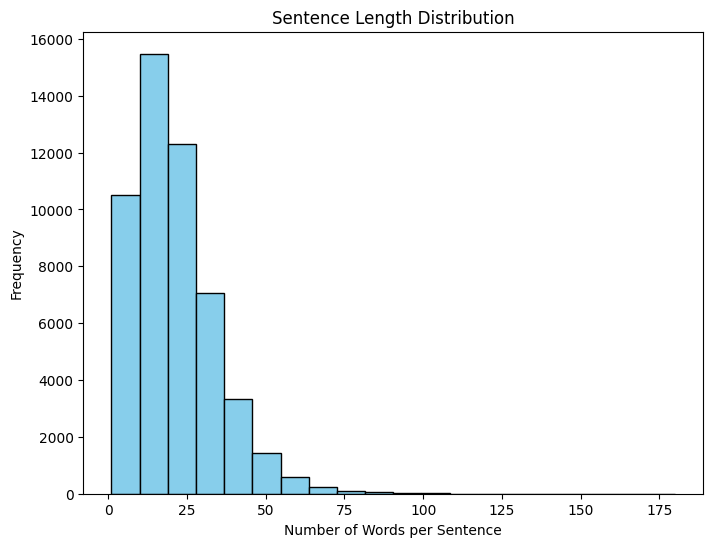

In [60]:
# Visualize the distribution of sentence lengths
plt.figure(figsize=(8, 6))
df['sentence_length'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words per Sentence")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

### Observation: No. of words in the first bin decreased and are closer to 10000 instead of 12000 after preprocessing

Length of tag distribution: 21

Tag Frequency Distribution:
tag
NOUN     239116
VERB     151350
ADP      124875
DET      115502
.         94258
ADJ       76492
ADV       48887
PRON      48510
CONJ      27227
PUNCT     23089
PROPN     18938
PRT       18667
NUM       16778
X         13147
AUX       12563
PART       7514
CCONJ      6446
SCONJ      3666
_          2643
INTJ        712
SYM         705
Name: count, dtype: int64


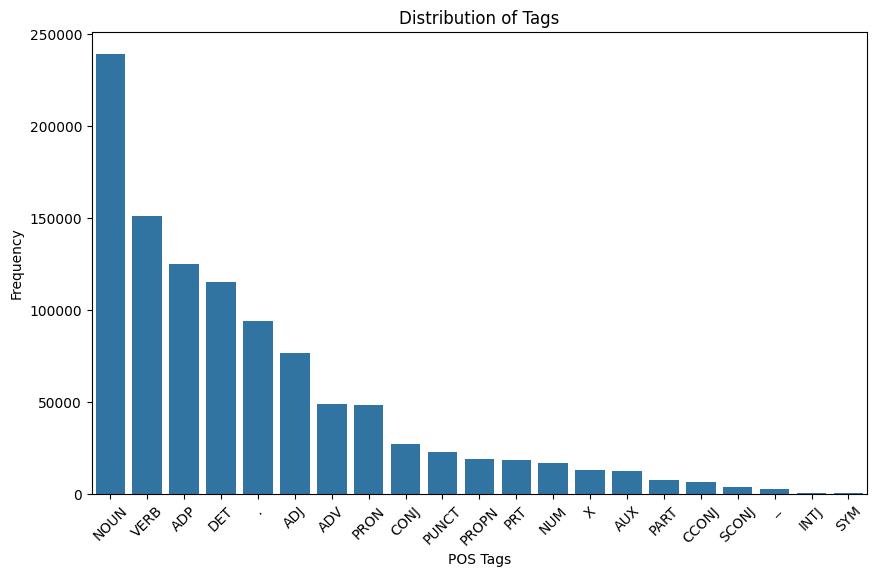

In [61]:
# Count the frequency of each tag
tag_distribution = df_words['tag'].value_counts()
print("Length of tag distribution:", len(tag_distribution))
print("\nTag Frequency Distribution:")
print(tag_distribution)

# Plot the distribution of tags
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=tag_distribution.index, y=tag_distribution.values)
plt.title("Distribution of Tags")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


Top 10 Most Frequent Words:
word
the     54411
,       48728
.       42284
of      31048
and     24549
to      23850
a       19556
in      17670
is      10267
that     9427
Name: count, dtype: int64


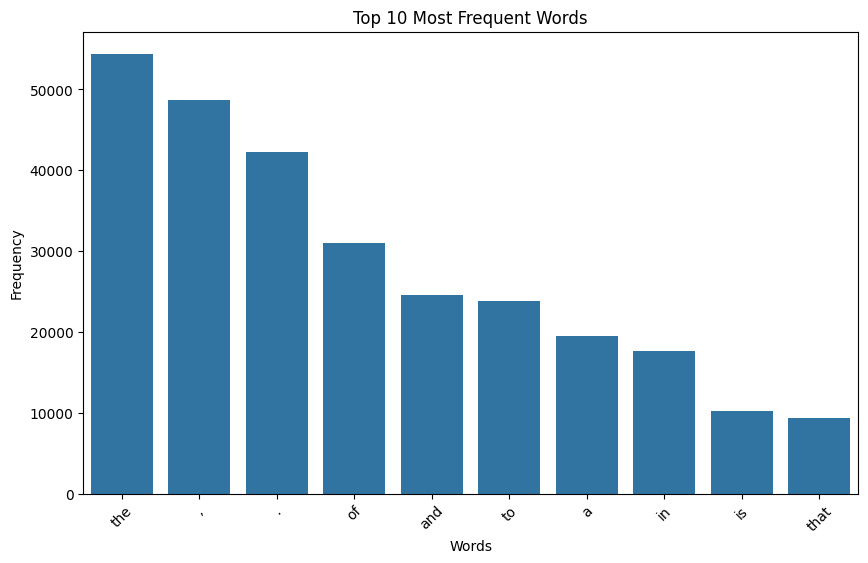

In [62]:
# Count the frequency of words
word_frequency = df_words['word'].value_counts()
print("\nTop 10 Most Frequent Words:")
print(word_frequency.head(10))

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=word_frequency.head(10).index, y=word_frequency.head(10).values)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

## Using HMM to solve the PoS tagging problem

#### Transition Probabilities
  
<ul>
  <li> Compute <i>P</i>(<i>tag</i><sub>t+1</sub> | <i>tag</i><sub>t</sub>): 
      the probability of transitioning from one tag to another.
  </li>
  <li> Formula:
      <i>P</i>(<i>tag</i><sub>t+1</sub> | <i>tag</i><sub>t</sub>) =
        <span >
            Count(<i>tag</i><sub>t+1</sub> given <i>tag</i><sub>t</sub>)
        </span>/
        Count(<i>tag</i><sub>t</sub>)
  </li>
</ul>

In [ ]:
# Compute transition probabilities P(tag2 | tag1)
transition_counts = defaultdict(lambda: defaultdict(int))
tag_counts = defaultdict(int)

for sentence in df['parsed_sentence']:
    prev_tag = None
    for _, tag in sentence:
        tag_counts[tag] += 1
        if prev_tag is not None:
            transition_counts[prev_tag][tag] += 1
        prev_tag = tag

# doing laplace smoothing to avoid zero probabilities and adding 1 to numerator and len(tags) to denominator for fair probability distribution 
transition_probs = {
    tag1: {tag2: (transition_counts[tag1][tag2] + 1) / (tag_counts[tag1] + len(tags))
           for tag2 in tags}
    for tag1 in tags
}

print("\nTransition Probabilities:\n", transition_probs)

<p style="font-size:16px">
Note:- Why Use Laplacian Smoothing in HMM?
<ul style="font-size:15px">
    <li> Avoids zero probabilities, preventing the Viterbi algorithm from breaking.
    <li> Encourages generalization, allowing the model to predict unseen sequences.
    <li> Prevents overfitting, distributing probability mass more fairly among possible transitions.
    <li> Handles sparse data, which is common in NLP and speech recognition.
</ul>
</p>

#### Emission Probabilities
  
<ul>
  <li> Compute P ( word | tag ) : 
      <i>the probability of a word being generated by a tag.</i>
  </li>
  <li> Formula:
      <i>P ( word | tag ) = Count(word,tag) / Count(tag)</i>
  </li>
</ul>

In [ ]:
# Compute emission probabilities P(word | tag)
emission_counts = defaultdict(lambda: defaultdict(int))

for sentence in df['parsed_sentence']:
    for word, tag in sentence:
        emission_counts[tag][word] += 1

emission_probs = {
    tag: {word: (emission_counts[tag][word] + 1) / (tag_counts[tag] + len(words))
          for word in words}
    for tag in tags
}

#### Initial Probabilities
  
<ul>
  <li> Compute <i>P</i>(<i>tag</i><sub>start</sub>)): 
      the probability of a tag starting the sentence.
  </li>
  <li> Formula:
      <i>P</i>(<i>tag</i><sub>start</sub>) =
        <span >
            Count(<i>tag</i><sub>start</sub>)
        </span>/
        Total sentences
  </li>
</ul>

In [ ]:
# Compute initial probabilities P(tag | start)
start_counts = defaultdict(int)
total_sentences = len(df['parsed_sentence'])

for sentence in df['parsed_sentence']:
    if sentence:  # Ensure the sentence is not empty
        first_tag = sentence[0][1]
        start_counts[first_tag] += 1

start_probs = {
    tag: (start_counts[tag] + 1) / (total_sentences + len(tags))
    for tag in tags
}

print("\nInitial Probabilities:\n", start_probs)

#### Viterbi Algorithm

<h style="font-size:14px">Now we are using Viterbi Algorithm to find the most likely sequence of hidden states in an HMM.</h>
<p style="font-size:14px">
    <i>V<sub>t</sub></i>(<i>tag</i>) =
        max<sub>prev_tag</sub> [ <i>V<sub>t-1</sub></i>(<i>prev_tag</i>) . P(tag | prev_tag) . P(word | tag) ]
</p>

In [ ]:
lexicon = {
    'the': 'DET',
    'a': 'DET',
    'an': 'DET',
    'this': 'DET',
    'i': 'PRON',
    'you': 'PRON',
    'they': 'PRON',
    'We': 'PRON',
    'he': 'PRON',
    'she': 'PRON',
    'it': 'PRON',
    'is': 'AUX',
    'was': 'AUX',
    'has': 'AUX',
    'but': 'CONJ',
    'and': 'CONJ',  
}

In [ ]:
def viterbi_algorithm(sentence, tags, transition_probs, emission_probs, start_probs):
    V = [{}]  # Viterbi matrix (list of dictionaries)
    backpointer = [{}]  # Backpointer matrix

    # **Lexicon-based heuristic for the first word**
    first_word = sentence[0].lower()
    first_tag = lexicon.get(first_word, None)  # Check if the word exists in the lexicon
    
    for tag in tags:
        if first_tag == tag:  # Give high probability if lexicon match
            V[0][tag] = 1.0
        else:
            V[0][tag] = start_probs.get(tag, 1e-6) * emission_probs[tag].get(first_word, 1e-6)
        
        backpointer[0][tag] = None
    
    # # Initialize the first column of the Viterbi matrix
    # for tag in tags:
    #     V[0][tag] = start_probs.get(tag, 1e-6) * emission_probs[tag].get(sentence[0], 1e-6)
    #     backpointer[0][tag] = None
    
    # Populate the Viterbi matrix
    for t in range(1, len(sentence)):
        V.append({})
        backpointer.append({})
        
        for tag in tags:
            max_prob, best_prev_tag = max(
                (V[t-1][prev_tag] * transition_probs[prev_tag].get(tag, 1e-6) * emission_probs[tag].get(sentence[t], 1e-6), prev_tag)
                for prev_tag in tags
            )
            V[t][tag] = max_prob
            backpointer[t][tag] = best_prev_tag
    
    # Backtrack to find the best sequence
    best_last_tag = max(V[-1], key=V[-1].get)
    best_tags = [best_last_tag]
    
    for t in range(len(sentence) - 1, 0, -1):
        best_tags.insert(0, backpointer[t][best_tags[0]])
    
    return best_tags

<p>Testing on sample sentence to check whether our algorithm working properly or not</p>

In [ ]:
# Sample sentence for demonstration
sample_sentence = ["This", "is", "a", "sample", "sentence", "."]

# Predict tags for the sample sentence using the Viterbi algorithm
predicted_tags_sample = viterbi_algorithm(sample_sentence, tags, transition_probs, emission_probs, start_probs)

# Print the sample sentence with predicted tags
print("Sample Sentence:", sample_sentence)
print("Predicted Tags:", predicted_tags_sample)

#### Evaluation of the HMM

<p>Applying the trained model on Testing dataset and evaluating the Model by giving the accuracy score and the confusion matrix</p>

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Function to predict tags for a given sentence using the Viterbi algorithm
def predict_tags(test_sentence, tags, transition_probs, emission_probs, start_probs):
    return viterbi_algorithm(test_sentence, tags, transition_probs, emission_probs, start_probs)

# Prepare the test data
test_sentences = df_test['parsed_sentence'].tolist()
true_tags = [[tag for _, tag in sentence] for sentence in test_sentences]

# Predict tags for each sentence in the test set
predicted_tags = [predict_tags([word for word, _ in sentence], tags, transition_probs, emission_probs, start_probs) if sentence else [] for sentence in test_sentences]

# Flatten the lists of true and predicted tags
true_tags_flat = [tag for sentence in true_tags for tag in sentence]
predicted_tags_flat = [tag for sentence in predicted_tags for tag in sentence]

# Calculate accuracy
accuracy = accuracy_score(true_tags_flat, predicted_tags_flat)
print(f"Model Accuracy: {accuracy:.3f}")
# Create a DataFrame for incorrectly predicted tags
incorrect_predictions = pd.DataFrame({
    'Word': [word for sentence in test_sentences for word, _ in sentence],
    'True_Tag': true_tags_flat,
    'Predicted_Tag': predicted_tags_flat
})

# Filter out the incorrect predictions
incorrect_predictions = incorrect_predictions[incorrect_predictions['True_Tag'] != incorrect_predictions['Predicted_Tag']]

# Display the first 10 incorrect predictions
print("\nFirst 10 Incorrect Predictions:")
print(incorrect_predictions.head(10))

# Display statistics of incorrect predictions
print("\nStatistics of Incorrect Predictions:")
print(incorrect_predictions.describe(include='all'))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_tags_flat, predicted_tags_flat, labels=tags)
print("\nConfusion Matrix:")
print(conf_matrix)

# Optionally, generate a classification report
class_report = classification_report(true_tags_flat, predicted_tags_flat, labels=tags)
print("\nClassification Report:")
print(class_report)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=tags, yticklabels=tags)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Tags')
plt.ylabel('True Tags')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
